In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
from scipy import stats

import model
# import model as model
%load_ext snakeviz

In [6]:
params = {'R0':2, 'delay':6, 'loss':0.1, 'iso_fac':0.2, 'test_fac':0.1}
params = {'R0':2, 'delay':0, 'loss':0., 'iso_fac':0.0, 'test_fac':1e2}

params = {'R0':2, 'delay':1, 'loss':0, 'iso_fac':0.2, 'test_fac':0.2}



In [7]:
tree = model.Tree(**params)
tree.run_sim(tspan_days=20, verbose=True)
tree.totals

Starting simulation for 20 days

118: I0->1
194: ...run_Ts: T0 CT0->1 (195)
195: ...run_Ts: T1 CT1->0 (196)
196: ...run_Ts:
288: R0
406: R1


{'active': 0, 'infected': 2, 'spontaneous': 1, 'tested': 2}

In [33]:
G = tree.G

In [35]:
list(G.nodes(data=True))

[(0, {'isolated': False, 'recovered': True, 't_infect': 0}),
 (1, {'isolated': False, 'recovered': True, 't_infect': 93}),
 (2, {'isolated': True, 'recovered': True, 't_infect': 124}),
 (3, {'isolated': False, 'recovered': True, 't_infect': 238}),
 (4, {'isolated': True, 'recovered': True, 't_infect': 255}),
 (5, {'isolated': False, 'recovered': True, 't_infect': 270}),
 (6, {'isolated': True, 'recovered': True, 't_infect': 275}),
 (7, {'isolated': True, 'recovered': True, 't_infect': 280}),
 (8, {'isolated': True, 'recovered': True, 't_infect': 285}),
 (9, {'isolated': True, 'recovered': True, 't_infect': 311}),
 (10, {'isolated': True, 'recovered': True, 't_infect': 319}),
 (11, {'isolated': True, 'recovered': True, 't_infect': 320}),
 (12, {'isolated': True, 'recovered': True, 't_infect': 396}),
 (13, {'isolated': False, 'recovered': True, 't_infect': 401}),
 (14, {'isolated': True, 'recovered': False, 't_infect': 548}),
 (15, {'isolated': True, 'recovered': False, 't_infect': 579})

In [4]:
#############################
# ONLY activate for profiling
# %%snakeviz
#############################

Ndraw = 30
tspan_days=30

infected = np.zeros(Ndraw)
spontaneous = np.zeros(Ndraw)
tested = np.zeros(Ndraw)
run_hist = []

for i in range(Ndraw):
    
    tree = model.Tree()
    tree.run_sim(tspan_days=tspan_days, verbose=False)
    totals = tree.totals
    G = tree.G
    
    run_hist.append(G)
    infected[i] = totals['infected']
    spontaneous[i] = totals['spontaneous']
    tested[i] = totals['tested']
    


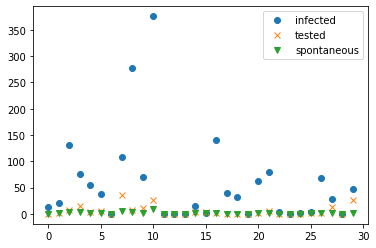

In [5]:
plt.figure()
plt.plot(infected, 'o', label='infected')
plt.plot(tested, 'x', label='tested')
plt.plot(spontaneous, 'v', label='spontaneous')

plt.legend()


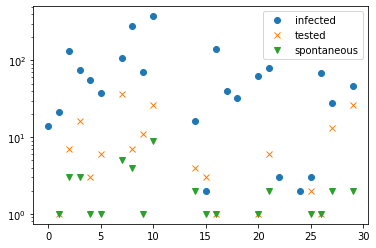

In [6]:
plt.figure()
plt.semilogy(infected, 'o', label='infected')
plt.semilogy(tested, 'x', label='tested')
plt.semilogy(spontaneous, 'v', label='spontaneous')

plt.legend()
